In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
release_dates = pd.read_csv(
    'data/release_dates.csv',
    parse_dates=['date'],
    infer_datetime_format=True,
)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

<AxesSubplot:xlabel='date'>

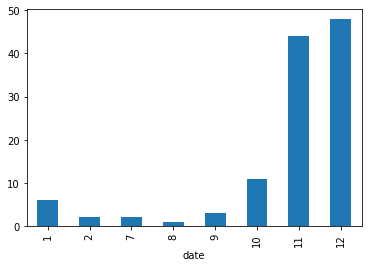

In [50]:
r = release_dates
r = r[(r.title.str.contains('Christmas')) & (r.country == 'USA')]
r.groupby(r.date.dt.month).size().plot(kind = 'bar', xlim = [0,12])

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

<AxesSubplot:xlabel='date'>

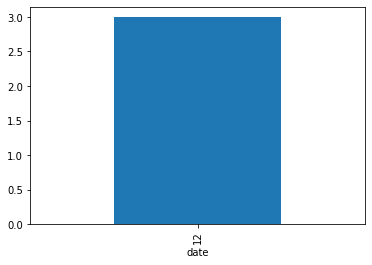

In [51]:
r = release_dates
r = r[(r.title.str.startswith('The Hobbit')) & (r.country == 'USA')]
r.groupby(r.date.dt.month).size().plot(kind = 'bar', xlim = [0,12])

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

<AxesSubplot:xlabel='date'>

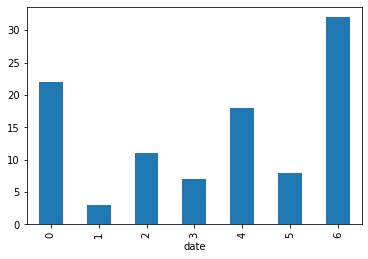

In [52]:
r = release_dates
r = r[(r.title.str.contains('Romance')) & (r.country == 'USA')]
r.groupby(r.date.dt.dayofweek).size().plot(kind = 'bar', xlim = [0,12])

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

<AxesSubplot:xlabel='date'>

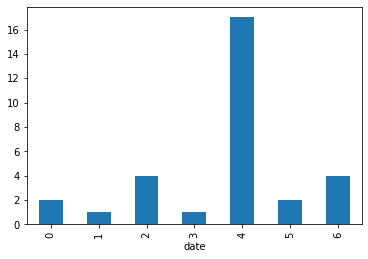

In [53]:
r = release_dates
r = r[(r.title.str.contains('Action')) & (r.country == 'USA')]
r.groupby(r.date.dt.dayofweek).size().plot(kind = 'bar', xlim = [0,12])

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [65]:
r = release_dates
c = cast
a = c[c.name == 'Judi Dench'].merge(r[(r.country == 'USA') & (r.year // 10 == 199)])
a.sort_values('date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

In [6]:
r = release_dates
c = cast
a = c[c.name == 'Judi Dench'].merge(r[r.country == 'USA'])
b = a.date.dt.month.value_counts().sort_index()
b

1      4
2      3
3      3
4      2
5      4
6      3
7      1
8      1
9      2
10     2
11    12
12     4
Name: date, dtype: int64

<AxesSubplot:>

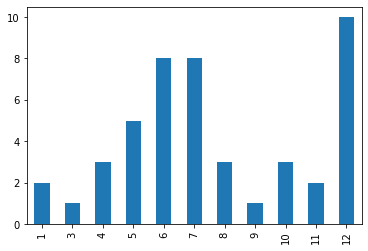

In [8]:
b.plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [7]:
r = release_dates
c = cast
a = c[c.name == 'Tom Cruise'].merge(r[r.country == 'USA'])
b = a.date.dt.month.value_counts().sort_index()
b

1      2
3      1
4      3
5      5
6      8
7      8
8      3
9      1
10     3
11     2
12    10
Name: date, dtype: int64

<AxesSubplot:>

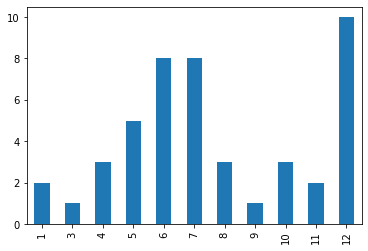

In [9]:
b.plot(kind = 'bar')

In [6]:
r = release_dates
r.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [9]:
r.date.dt.month

0          6
1         10
2          1
3          9
4          1
          ..
443481     4
443482     6
443483     6
443484     6
443485     6
Name: date, Length: 443486, dtype: int64

In [11]:
#merge
c = cast
c[c.name == 'Ellen Page'].merge(r)

,title,year,name,type,character,n,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Mexico,2008-08-08
...,...,...,...,...,...,...,...,...
504,X-Men: The Last Stand,2006,Ellen Page,actress,Shadowcat,13.0,South Korea,2006-06-15
505,X-Men: The Last Stand,2006,Ellen Page,actress,Shadowcat,13.0,Taiwan,2006-06-16
506,X-Men: The Last Stand,2006,Ellen Page,actress,Shadowcat,13.0,Vietnam,2006-08-04
507,X-Men: The Last Stand,2006,Ellen Page,actress,Shadowcat,13.0,China,2006-09-08


In [27]:
r = release_dates
r = r[(r.title.str.startswith('Star Wars: Episode')) | (r.title == 'Star Wars')]
r = r[r.country.str.startswith('U')]
r.pivot('title', 'country', 'year').fillna('')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars,1977,1977.0,,,1977
Star Wars: Episode I - The Phantom Menace,1999,1999.0,,1999,1999
Star Wars: Episode II - Attack of the Clones,2002,2002.0,2002,2002,2002
Star Wars: Episode III - Revenge of the Sith,2005,2005.0,,2005,2005
Star Wars: Episode IX,,2019.0,,,
Star Wars: Episode V - The Empire Strikes Back,1980,1980.0,,,1980
Star Wars: Episode VI - Return of the Jedi,1983,1983.0,,,1983
Star Wars: Episode VII - The Force Awakens,2015,2015.0,2015,2015,2015
Star Wars: Episode VIII - The Last Jedi,2017,2017.0,2017,,2017


In [10]:
c = cast
c = c[(c.name == 'Tom Cruise') & (c.n == 1)]
c = c.merge(cast, on=['title', 'year'])
c[c.n_y == 2]

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
20,A Few Good Men,1992,Tom Cruise,actor,Lt. Daniel Kaffee,1.0,Jack Nicholson,actor,Col. Nathan R. Jessep,2.0
56,All the Right Moves,1983,Tom Cruise,actor,Stefen Djordjevic,1.0,Craig T. Nelson,actor,Nickerson,2.0
119,American Made,2017,Tom Cruise,actor,Barry Seal,1.0,Domhnall Gleeson,actor,Monty Schafer,2.0
251,Born on the Fourth of July,1989,Tom Cruise,actor,Ron Kovic,1.0,Raymond J. Barry,actor,Mr. Kovic,2.0
427,Cocktail,1988,Tom Cruise,actor,Brian Flanagan,1.0,Bryan Brown,actor,Doug Coughlin,2.0
505,Collateral,2004,Tom Cruise,actor,Vincent,1.0,Jamie Foxx,actor,Max,2.0
629,Days of Thunder,1990,Tom Cruise,actor,Cole Trickle,1.0,Nicole Kidman,actress,Dr. Claire Lewicki,2.0
714,Edge of Tomorrow,2014,Tom Cruise,actor,Cage,1.0,Emily Blunt,actress,Rita,2.0
798,Eyes Wide Shut,1999,Tom Cruise,actor,Dr. William Harford,1.0,Nicole Kidman,actress,Alice Harford,2.0
885,Far and Away,1992,Tom Cruise,actor,Joseph Donnelly,1.0,Nicole Kidman,actress,Shannon Christie,2.0
